## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
a=-2
b=1
X=np.linspace(0,20)

Y=a*X+b
Y.shape

(50,)

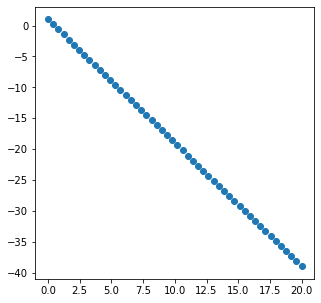

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)

In [4]:
def SingleVariableGD (Data,Target,alpha):
    Earr=[]
    Carr=[]
    TH1arr=[]
    TH0arr=[]
    count=1
    Carr.append(count)
    X0=Data[:,0]
    X1=Data[:,1]
    TH0=0
    TH1=0
    TH1arr.append(TH1)
    TH0arr.append(TH0)
    TH=np.array([[TH0],[TH1]])
    YD=Data@TH
    Error=YD-Target
    MSError=((np.linalg.norm(Error))**2)*(1/(2*len(Target)))
    Earr.append(MSError)
    GDTH0=((1/len(Target))*(Error.reshape(1,-1)@X0.reshape(-1,1)))[0,0]
    GDTH1=((1/len(Target))*(Error.reshape(1,-1)@X1.reshape(-1,1)))[0,0]
    GDV=np.array([[GDTH0],[GDTH1]])
    GDVN=np.linalg.norm(GDV)
    GDVN1=100
    while(GDVN>=0.001):
        GDVN1=GDVN
        count+=1
        Carr.append(count)
        TH0=TH0-(alpha*GDTH0)
        TH1=TH1-(alpha*GDTH1)
        TH1arr.append(TH1)
        TH0arr.append(TH0)
        TH=np.array([[TH0],[TH1]])
        YD=Data@TH
        Error=YD-Target
        MSError=((np.linalg.norm(Error))**2)*(1/(2*len(Target)))
        Earr.append(MSError)
        GDTH0=((1/len(Target))*(Error.reshape(1,-1)@X0.reshape(-1,1)))[0,0]
        GDTH1=((1/len(Target))*(Error.reshape(1,-1)@X1.reshape(-1,1)))[0,0]
        GDV=np.array([[GDTH0],[GDTH1]])
        GDVN=np.linalg.norm(GDV)
        if (abs(Earr[-1]-Earr[-2])<0.01):
            break
        
    return TH,Carr,Earr,count,TH1arr,TH0arr
    

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [5]:
X=X.reshape(-1,1)

In [6]:
Y=Y.reshape(-1,1)

In [7]:
ones=np.ones(shape=Y.shape)

In [8]:
Features=np.hstack([ones,X])

In [9]:
Features

array([[ 1.        ,  0.        ],
       [ 1.        ,  0.40816327],
       [ 1.        ,  0.81632653],
       [ 1.        ,  1.2244898 ],
       [ 1.        ,  1.63265306],
       [ 1.        ,  2.04081633],
       [ 1.        ,  2.44897959],
       [ 1.        ,  2.85714286],
       [ 1.        ,  3.26530612],
       [ 1.        ,  3.67346939],
       [ 1.        ,  4.08163265],
       [ 1.        ,  4.48979592],
       [ 1.        ,  4.89795918],
       [ 1.        ,  5.30612245],
       [ 1.        ,  5.71428571],
       [ 1.        ,  6.12244898],
       [ 1.        ,  6.53061224],
       [ 1.        ,  6.93877551],
       [ 1.        ,  7.34693878],
       [ 1.        ,  7.75510204],
       [ 1.        ,  8.16326531],
       [ 1.        ,  8.57142857],
       [ 1.        ,  8.97959184],
       [ 1.        ,  9.3877551 ],
       [ 1.        ,  9.79591837],
       [ 1.        , 10.20408163],
       [ 1.        , 10.6122449 ],
       [ 1.        , 11.02040816],
       [ 1.        ,

#### Try your function with any input parameterss of your choice.

In [10]:
TH,Carr,Earr,count,TH1arr,TH0arr=SingleVariableGD (Features,Y,0.001)

In [11]:
Y_pred_GD=Features@TH

#### Calculate r2 score

In [12]:
from sklearn.metrics import r2_score

In [13]:
r2_score(Y,Y_pred_GD)

0.9972924318863261

#### Plot loss vs. epochs

Text(0, 0.5, 'MSE')

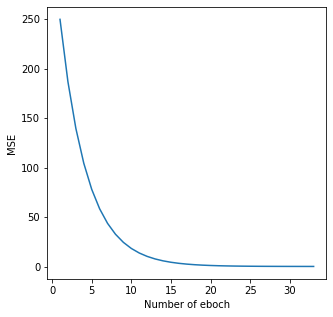

In [14]:
plt.figure(figsize=(5,5))
plt.plot(Carr,Earr)
plt.xlabel("Number of eboch")
plt.ylabel("MSE")

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

Text(0, 0.5, 'MSE')

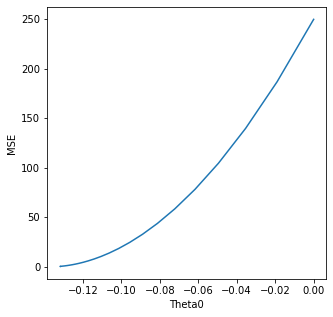

In [15]:
plt.figure(figsize=(5,5))
plt.plot(TH0arr,Earr)
plt.xlabel("Theta0")
plt.ylabel("MSE")

Text(0, 0.5, 'MSE')

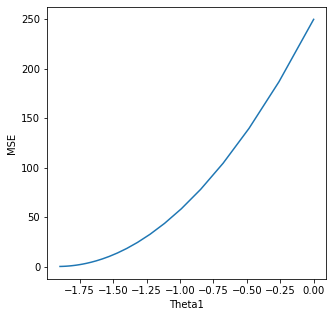

In [16]:
plt.figure(figsize=(5,5))
plt.plot(TH1arr,Earr)
plt.xlabel("Theta1")
plt.ylabel("MSE")

#### Plot all regression lines till converge

In [17]:
x=np.linspace(0,20)
y=a*x+b
Thetas=[]
for i in range(0,len(TH0arr)):
    Thetas.append([TH0arr[i],TH1arr[i]])
print(Thetas)

[[0, 0], [-0.019, -0.2593877551020409], [-0.0353871224489796, -0.48364756768013334], [-0.04951525964972929, -0.6775370852987277], [-0.06169037353709229, -0.8451695906007691], [-0.07217698725754751, -0.9901012726212131], [-0.08120379754407783, -1.1154066782731273], [-0.08896852696380249, -1.2237439448568164], [-0.09564211898827052, -1.3174111976268725], [-0.10137236489301353, -1.3983953090015335], [-0.10628703943810518, -1.4684140539360704], [-0.11049661185930637, -1.5289525558686676], [-0.1140965896887604, -1.5812947965106214], [-0.11716954513396542, -1.6265508580225072], [-0.11978686700860638, -1.6656804755722177], [-0.1220102753858756, -1.6995133999883227], [-0.1238931311106065, -1.7287670025421593], [-0.1254815679540743, -1.754061495378436], [-0.12681547143233587, -1.775933090525473], [-0.1279293250556488, -1.7948453766791472], [-0.12885294196380168, -1.8111991551411954], [-0.12961209747042593, -1.8253409436004984], [-0.13022907593695052, -1.8375703281816453], [-0.13072314357919712,

Text(0.5, 1.0, ' all regression lines till converge')

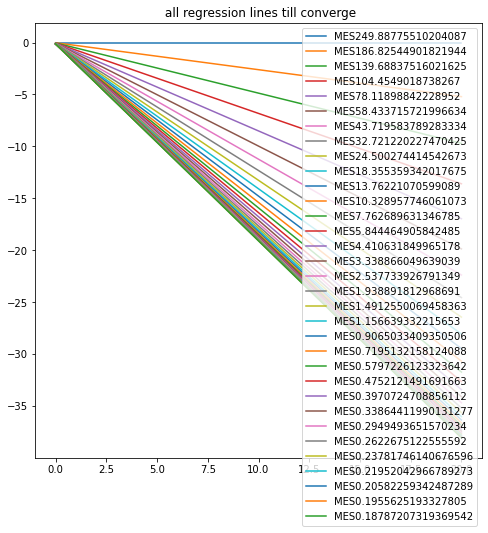

In [18]:
plt.figure(figsize=(8,8))
for i,j in enumerate (Thetas) :
    plt.plot(x,j[1]*x+j[0],label=f'MES{Earr[i]}')
    plt.legend()
plt.title(" all regression lines till converge")


#### Plot the best regression line

Text(0.5, 1.0, 'Best fitting line')

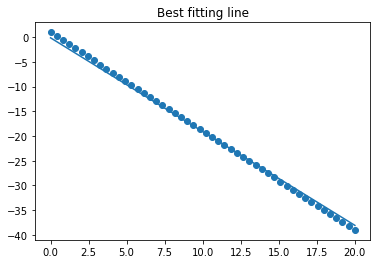

In [19]:
plt.scatter(X,Y)
plt.plot(x,Thetas[-1][1]*X+Thetas[-1][0])
plt.title("Best fitting line")

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [20]:
def GD_SV_ALL_in_1 (Features,Y,alpha):
    TH,Carr,Earr,count,TH1arr,TH0arr=SingleVariableGD (Features,Y,alpha)
    Y_pred_GD=Features@TH
    r2_score(Y,Y_pred_GD)
    plt.figure(figsize=(5,5))
    plt.plot(Carr,Earr)
    plt.xlabel("Number of eboch")
    plt.ylabel("MSE")
    plt.figure(figsize=(5,5))
    plt.plot(TH0arr,Earr)
    plt.xlabel("Theta0")
    plt.ylabel("MSE")
    plt.figure(figsize=(5,5))
    plt.plot(TH1arr,Earr)
    plt.xlabel("Theta1")
    plt.ylabel("MSE")
    x=np.linspace(0,20)
    y=a*x+b
    Thetas=[]
    for i in range(0,len(TH0arr)):
        Thetas.append([TH0arr[i],TH1arr[i]])
    plt.figure(figsize=(5,5))
    for i,j in enumerate (Thetas) :
        plt.plot(x,j[1]*x+j[0],label=f'MES{Earr[i]}')
        plt.legend()
    plt.title(" all regression lines till converge")

    plt.figure(figsize=(5,5))
    X=Features[:,1]
    plt.scatter(X,Y)
    plt.plot(x,Thetas[-1][1]*x+Thetas[-1][0])
    plt.title("Best fitting line")

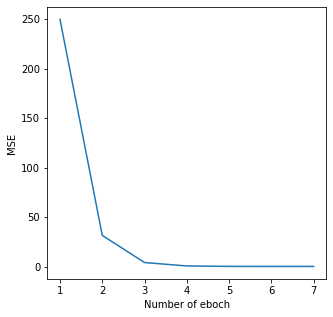

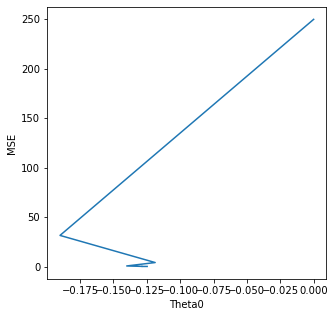

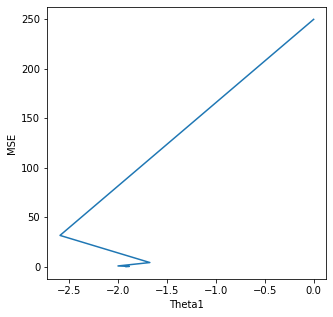

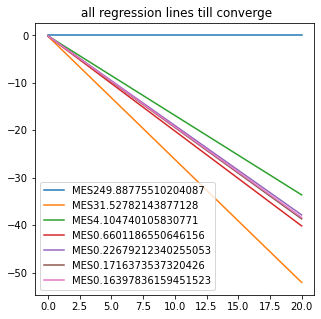

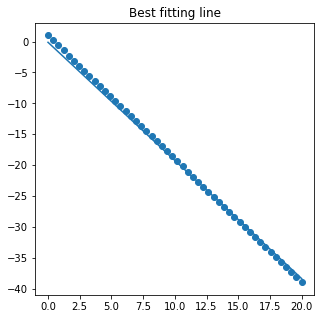

In [21]:
#aplha=0.01
alpha=0.01
GD_SV_ALL_in_1 (Features,Y,alpha)

In [22]:
#aplha=0.1
#alpha=0.1
#GD_SV_ALL_in_1 (Features,Y,alpha)

In [23]:
#aplha=1
#alpha=1
#GD_SV_ALL_in_1 (Features,Y,alpha)

In [24]:
TH

array([[-0.13176645],
       [-1.89753167]])

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [25]:
def SV_mini_Batch_GD (Data,Target,alpha,BatchSize):
    Earr=[]
    Carr=[]
    count=0
    TH0arr=[]
    TH1arr=[]
    TH=np.zeros(shape=(Data.shape[1],1))    
    GDVN=100
    while(GDVN>=1):
        G=0
        if (int(len(Target)%BatchSize)==0):
            R=int(len(Target)/BatchSize)
        else:
            R=int(len(Target)/BatchSize)+1
        for i in range(0,R):
            
            if (G+BatchSize>len(Target)):
                TH0arr.extend(TH[0])
                TH1arr.extend(TH[1])
                count+=1
                Carr.append(count)
                YD=Data[G:len(Target)]@TH
                Error=YD-Target[G:len(Target)]
                MSError=((np.linalg.norm(Error))**2)*(1/(2*(len(Target)-G)))
                Earr.append(MSError)
                GDV=(1/(len(Target)-G))*(Data[G:len(Target)].T)@Error
                GDVN=np.linalg.norm(GDV)
                TH=TH-(alpha*GDV)

            else:
                count+=1
                TH0arr.extend(TH[0])
                TH1arr.extend(TH[1])
                Carr.append(count)
                YD=Data[G:G+BatchSize]@TH
                #print(YD.shape)
                #print(Target[G:G+BatchSize].shape)
                Error=YD-Target[G:G+BatchSize]
                MSError=((np.linalg.norm(Error))**2)*(1/(2*(BatchSize)))
                Earr.append(MSError)
                #print(MSError)
                GDV=(1/(BatchSize))*(Data[G:G+BatchSize].T)@Error
                GDVN=np.linalg.norm(GDV)
                TH=TH-(alpha*GDV)
            G=G+BatchSize
    return TH,Carr,Earr,count,TH0arr,TH1arr
            


In [26]:
TH,Carr,Earr,count,TH0arr,TH1arr=SV_mini_Batch_GD (Features,Y,0.01,5)

In [27]:
Y_pred_GD=Features@TH

In [28]:
r2_score(Y,Y_pred_GD)

0.9965868526315507

Text(0, 0.5, 'MSE')

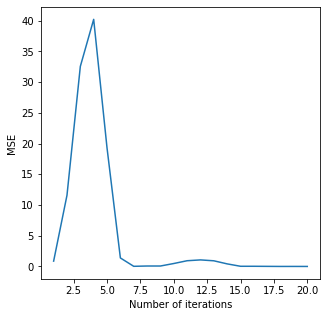

In [29]:
plt.figure(figsize=(5,5))
plt.plot(Carr,Earr)
plt.xlabel("Number of iterations")
plt.ylabel("MSE")

Text(0, 0.5, 'MSE')

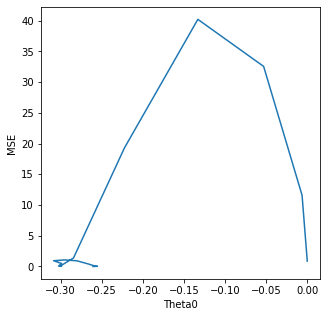

In [30]:
plt.figure(figsize=(5,5))
plt.plot(TH0arr,Earr)
plt.xlabel("Theta0")
plt.ylabel("MSE")

Text(0, 0.5, 'MSE')

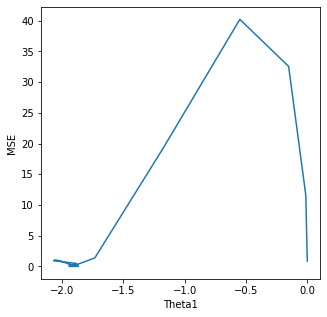

In [31]:
plt.figure(figsize=(5,5))
plt.plot(TH1arr,Earr)
plt.xlabel("Theta1")
plt.ylabel("MSE")

In [32]:
TH,Carr,Earr,count,TH0arr,TH1arr=SV_mini_Batch_GD (Features,Y,0.01,20)

In [33]:
Y_pred_GD=Features@TH

In [34]:
r2_score(Y,Y_pred_GD)

0.9931170924226946

Text(0, 0.5, 'MSE')

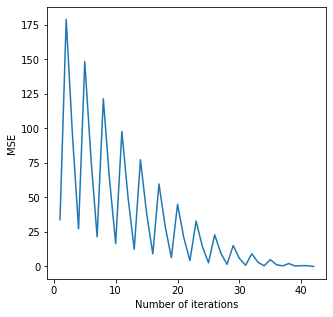

In [35]:
plt.figure(figsize=(5,5))
plt.plot(Carr,Earr)
plt.xlabel("Number of iterations")
plt.ylabel("MSE")

Text(0, 0.5, 'MSE')

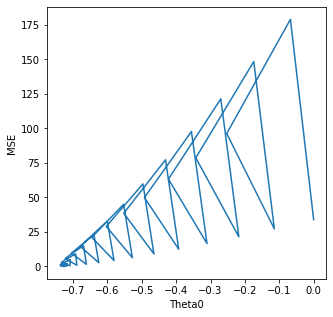

In [36]:
plt.figure(figsize=(5,5))
plt.plot(TH0arr,Earr)
plt.xlabel("Theta0")
plt.ylabel("MSE")

Text(0, 0.5, 'MSE')

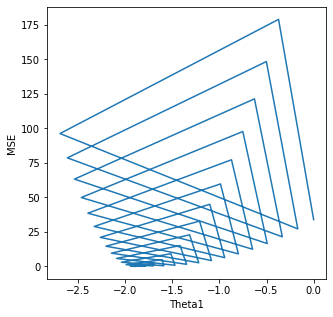

In [37]:
plt.figure(figsize=(5,5))
plt.plot(TH1arr,Earr)
plt.xlabel("Theta1")
plt.ylabel("MSE")

0.9975950054190024


Text(0, 0.5, 'MSE')

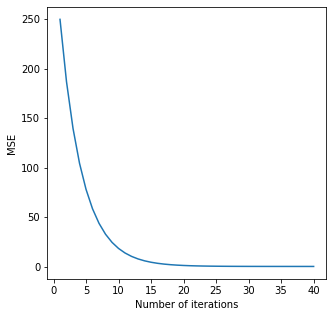

In [38]:
TH,Carr,Earr,count,TH0arr,TH1arr=SV_mini_Batch_GD (Features,Y,0.001,50)
Y_pred_GD=Features@TH
print(r2_score(Y,Y_pred_GD))
plt.figure(figsize=(5,5))
plt.plot(Carr,Earr)
plt.xlabel("Number of iterations")
plt.ylabel("MSE")

In [39]:
def suffle (Features,Y):
    Data=np.hstack([Features,Y])
    np.random.shuffle(Data)
    Features=Data[:,0:Data.shape[1]-1]
    Y=Data[:,-1].reshape(-1,1)
    return Features,Y

In [40]:
def MV_mini_Batch_GD_With_Suffle (Data,Target,alpha,BatchSize):
    Earr=[]
    Carr=[]
    Earr=[]
    Carr=[]
    count=0
    TH0arr=[]
    TH1arr=[]
    TH=np.zeros(shape=(Data.shape[1],1))    
    GDVN=100
    while(GDVN>=10):
        G=0
        if (int(len(Target)%BatchSize)==0):
            R=int(len(Target)/BatchSize)
        else:
            R=int(len(Target)/BatchSize)+1
        for i in range(0,R):
            
            if (G+BatchSize>len(Target)):
                TH0arr.extend(TH[0])
                TH1arr.extend(TH[1])
                count+=1
                Carr.append(count)
                YD=Data[G:len(Target)]@TH
                Error=YD-Target[G:len(Target)]
                MSError=((np.linalg.norm(Error))**2)*(1/(2*(len(Target)-G)))
                Earr.append(MSError)
                GDV=(1/(len(Target)-G))*(Data[G:len(Target)].T)@Error
                GDVN=np.linalg.norm(GDV)
                TH=TH-(alpha*GDV)

            else:
                count+=1
                TH0arr.extend(TH[0])
                TH1arr.extend(TH[1])
                Carr.append(count)
                YD=Data[G:G+BatchSize]@TH
                #print(YD.shape)
                #print(Target[G:G+BatchSize].shape)
                Error=YD-Target[G:G+BatchSize]
                MSError=((np.linalg.norm(Error))**2)*(1/(2*(BatchSize)))
                Earr.append(MSError)
                #print(MSError)
                GDV=(1/(BatchSize))*(Data[G:G+BatchSize].T)@Error
                GDVN=np.linalg.norm(GDV)
                TH=TH-(alpha*GDV)
            G=G+BatchSize
            Data,Target=suffle (Data,Target)
    return TH,Carr,Earr,count,TH0arr,TH1arr


In [41]:
TH,Carr,Earr,count,TH0arr,TH1arr=MV_mini_Batch_GD_With_Suffle(Features,Y,0.001,5)
Y_pred_GD=Features@TH
from sklearn.metrics import r2_score
r2_score(Y,Y_pred_GD)

0.9965015163595603

Text(0, 0.5, 'MSE')

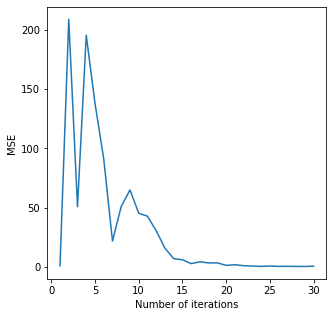

In [42]:
plt.figure(figsize=(5,5))
plt.plot(Carr,Earr)
plt.xlabel("Number of iterations")
plt.ylabel("MSE")

Text(0, 0.5, 'MSE')

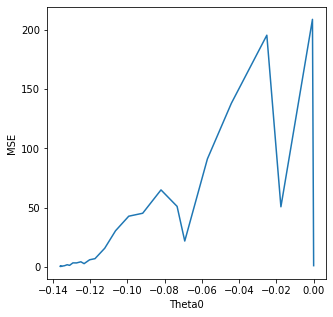

In [43]:
plt.figure(figsize=(5,5))
plt.plot(TH0arr,Earr)
plt.xlabel("Theta0")
plt.ylabel("MSE")

Text(0, 0.5, 'MSE')

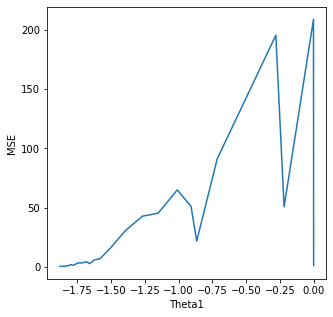

In [45]:
plt.figure(figsize=(5,5))
plt.plot(TH1arr,Earr)
plt.xlabel("Theta1")
plt.ylabel("MSE")

In [120]:
TH,Carr,Earr,count,TH0arr,TH1arr=MV_mini_Batch_GD_With_Suffle(Features,Y,0.001,50)
Y_pred_GD=Features@TH
from sklearn.metrics import r2_score
r2_score(Y,Y_pred_GD)

0.9942774849784133

Text(0, 0.5, 'MSE')

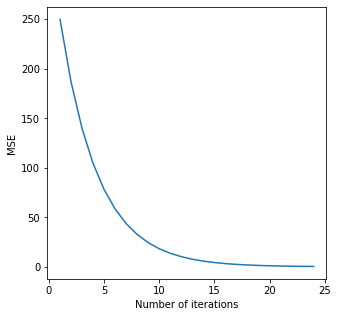

In [121]:
plt.figure(figsize=(5,5))
plt.plot(Carr,Earr)
plt.xlabel("Number of iterations")
plt.ylabel("MSE")

Text(0, 0.5, 'MSE')

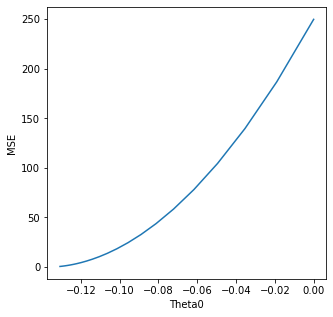

In [122]:
plt.figure(figsize=(5,5))
plt.plot(TH0arr,Earr)
plt.xlabel("Theta0")
plt.ylabel("MSE")

Text(0, 0.5, 'MSE')

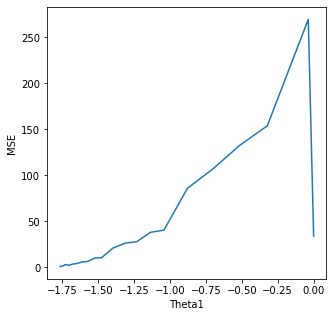

In [53]:
plt.figure(figsize=(5,5))
plt.plot(TH1arr,Earr)
plt.xlabel("Theta1")
plt.ylabel("MSE")

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [96]:
def MV_Stochastich_GD (Data,Target,alpha):
    Earr=[]
    Carr=[]
    TH0arr=[]
    TH1arr=[]
    count=0
    TH=np.zeros(shape=(Data.shape[1],1))
    MSError=100
    while(MSError>=0.01):
        G=0
        for i in range(0,len(Target)):
            count+=1
            Carr.append(count)
            TH0arr.extend(TH[0])
            TH1arr.extend(TH[1])
            YD=Data[G:G+1]@TH
            #print(YD.shape)
            #print(Target[G:G+1].shape)
            Error=YD-Target[G:G+1]
            MSError=((np.linalg.norm(Error))**2)*(1/(2*(1)))
            Earr.append(MSError)
            #print(MSError)
            GDV=(1/(1))*(Data[G:G+1].T)*Error
            GDVN=np.linalg.norm(GDV)
            TH=TH-(alpha*GDV)
            G=G+1
    return TH,Carr,Earr,count,TH0arr,TH1arr
            


In [97]:
TH,Carr,Earr,count,TH0arr,TH1arr=MV_Stochastich_GD (Features,Y,0.001)

In [98]:
TH,Carr,Earr,count,TH0arr,TH1arr=MV_Stochastich_GD (Features,Y,0.001)
Y_pred_GD=Features@TH
from sklearn.metrics import r2_score
r2_score(Y,Y_pred_GD)

0.9964730927232207

Text(0, 0.5, 'MSE')

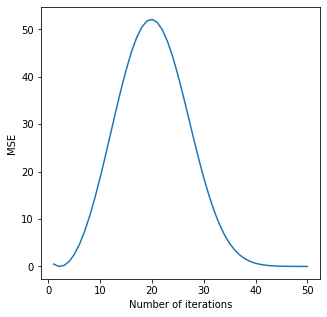

In [99]:
plt.figure(figsize=(5,5))
plt.plot(Carr,Earr)
plt.xlabel("Number of iterations")
plt.ylabel("MSE")

Text(0, 0.5, 'MSE')

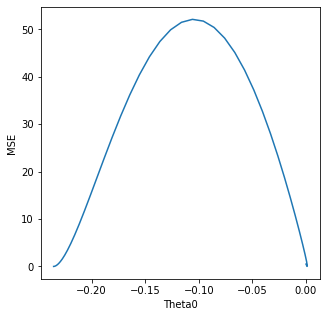

In [100]:
plt.figure(figsize=(5,5))
plt.plot(TH0arr,Earr)
plt.xlabel("Theta0")
plt.ylabel("MSE")

Text(0, 0.5, 'MSE')

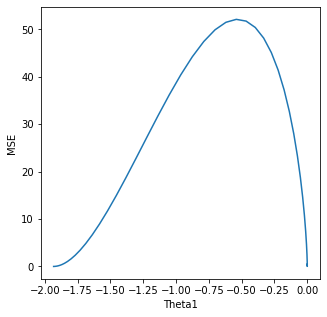

In [101]:
plt.figure(figsize=(5,5))
plt.plot(TH1arr,Earr)
plt.xlabel("Theta1")
plt.ylabel("MSE")

In [114]:
def MV_Stochastich_GD_ًWith_shuffle (Data,Target,alpha):
    Earr=[]
    Carr=[]
    TH0arr=[]
    TH1arr=[]
    count=0
    TH=np.zeros(shape=(Data.shape[1],1))
    MSError=100
    while(MSError>=1):
        G=0
        for i in range(0,len(Target)):
            count+=1
            Carr.append(count)
            TH0arr.extend(TH[0])
            TH1arr.extend(TH[1])
            YD=Data[G:G+1]@TH
            #print(YD.shape)
            #print(Target[G:G+1].shape)
            Error=YD-Target[G:G+1]
            MSError=((np.linalg.norm(Error))**2)*(1/(2*(1)))
            Earr.append(MSError)
            #print(MSError)
            GDV=(1/(1))*(Data[G:G+1].T)@Error
            print(Data[G:G+1].T)
            print("-----------")
            print(Error)
            print('-----------')
            print(GDV)
            GDVN=np.linalg.norm(GDV)
            TH=TH-(alpha*GDV)
            
            G=G+1
            Data,Target=suffle (Data,Target)
    return TH,Carr,Earr,count,TH0arr,TH1arr

In [115]:
TH,Carr,Earr,count,TH0arr,TH1arr=MV_Stochastich_GD_ًWith_shuffle (Features,Y,0.001)

[[1.]
 [0.]]
-----------
[[-1.]]
-----------
[[-1.]
 [ 0.]]
[[ 1.        ]
 [19.18367347]]
-----------
[[37.36834694]]
-----------
[[ 37.36834694]
 [716.86216576]]
[[ 1.        ]
 [13.87755102]]
-----------
[[16.77044241]]
-----------
[[ 16.77044241]
 [232.73267023]]
[[1.        ]
 [6.53061224]]
-----------
[[5.80665004]]
-----------
[[ 5.80665004]
 [37.92097983]]
[[ 1.        ]
 [13.87755102]]
-----------
[[12.99185548]]
-----------
[[ 12.99185548]
 [180.29513733]]
[[1.        ]
 [6.53061224]]
-----------
[[4.36276668]]
-----------
[[ 4.36276668]
 [28.49153753]]
[[1.        ]
 [2.04081633]]
-----------
[[0.56389894]]
-----------
[[0.56389894]
 [1.15081416]]
[[1.        ]
 [5.71428571]]
-----------
[[3.50911715]]
-----------
[[ 3.50911715]
 [20.05209803]]
[[1.        ]
 [4.08163265]]
-----------
[[2.11348242]]
-----------
[[2.11348242]
 [8.62645886]]
[[ 1.        ]
 [19.59183673]]
-----------
[[14.07901166]]
-----------
[[ 14.07901166]
 [275.83369781]]
[[ 1.        ]
 [14.28571429]]
--

In [116]:
Y_pred_GD=Features@TH
from sklearn.metrics import r2_score
r2_score(Y,Y_pred_GD)

0.99762148306239

Text(0, 0.5, 'MSE')

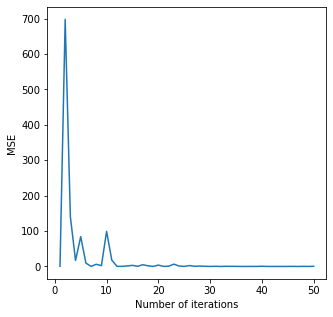

In [117]:
plt.figure(figsize=(5,5))
plt.plot(Carr,Earr)
plt.xlabel("Number of iterations")
plt.ylabel("MSE")

Text(0, 0.5, 'MSE')

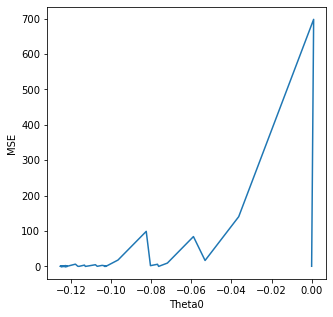

In [118]:
plt.figure(figsize=(5,5))
plt.plot(TH0arr,Earr)
plt.xlabel("Theta0")
plt.ylabel("MSE")

Text(0, 0.5, 'MSE')

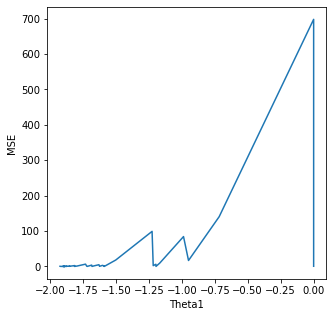

In [119]:
plt.figure(figsize=(5,5))
plt.plot(TH1arr,Earr)
plt.xlabel("Theta1")
plt.ylabel("MSE")